<a href="https://colab.research.google.com/github/vuaanhua/bui-le-anh-vu-20104073/blob/main/Copy_of_nh%E1%BA%ADn_di%C3%AAn_sp_l%E1%BB%97i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib-venn

In [ ]:
!pip install cartopy
import cartopy

In [ ]:
from sklearn.model_selection import train_test_split
from google.colab import drive
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/NHANDIENSPLOI

/content/drive/MyDrive/Colab Notebooks/NHANDIENSPLOI


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/NHANDIENSPLOI/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 109 images belonging to 6 classes.


In [ ]:
input =train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/NHANDIENSPLOI/input',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 111 images belonging to 6 classes.


In [ ]:
training_set.class_indices

{'0193-A chua dinh tam': 0,
 '1221-A Mặt cắt 6,840': 1,
 '1221-A Mặt cắt 6,845': 2,
 '1221-A co bac phi': 3,
 '1221-A co duoi chuot': 4,
 '590-221 loi mat cat': 5}

In [ ]:
input.class_indices

{'0193-A chua dinh tam': 0,
 '1221-A Mặt cắt 6,840': 1,
 '1221-A Mặt cắt 6,845': 2,
 '1221-A co bac phi': 3,
 '1221-A co duoi chuot': 4,
 '590-221 loi mat cat': 5}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform', input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

In [ ]:
model.add(Flatten())


In [ ]:
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(6, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 74, 74, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                 

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(training_set, epochs = 55, batch_size=128, verbose = 1, validation_data = input, callbacks = [EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/55
4/4 [==============================] - 32s 7s/step - loss: 2.1575 - accuracy: 0.2569 - val_loss: 1.4500 - val_accuracy: 0.4234
Epoch 2/55
4/4 [==============================] - 15s 5s/step - loss: 1.5497 - accuracy: 0.4128 - val_loss: 1.5284 - val_accuracy: 0.4234
Epoch 3/55
4/4 [==============================] - 16s 5s/step - loss: 1.5339 - accuracy: 0.4037 - val_loss: 1.4573 - val_accuracy: 0.4324
Epoch 4/55
4/4 [==============================] - 15s 5s/step - loss: 1.5577 - accuracy: 0.4312 - val_loss: 1.4476 - val_accuracy: 0.4234
Epoch 5/55
4/4 [==============================] - 14s 4s/step - loss: 1.4398 - accuracy: 0.5138 - val_loss: 1.2835 - val_accuracy: 0.6486
Epoch 6/55
4/4 [==============================] - 15s 4s/step - loss: 1.1532 - accuracy: 0.6606 - val_loss: 1.0302 - val_accuracy: 0.6667
Epoch 7/55
4/4 [==============================] - 16s 5s/step - loss: 0.9537 - accuracy: 0.6972 - val_loss: 0.9127 - val_accuracy: 0.6667
Epoch 8/55
4/4 [==================

In [ ]:
Score = model.evaluate(training_set, verbose = 0)
print('train loss', Score[0])
print('train accuracy', Score[1])

train loss 0.09976017475128174
train accuracy 0.9449541568756104


In [ ]:
model.save("nhandiensploi.h5")

In [ ]:
model_CNN = load_model('nhandiensploi.h5')

1/1 [==============================] - 0s 168ms/step
1221-A co bac phi


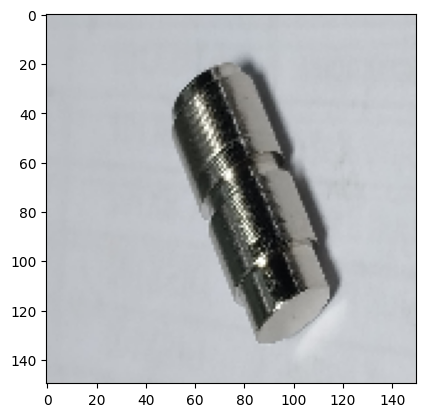

1/1 [==============================] - 0s 28ms/step
0193-A chua dinh tam


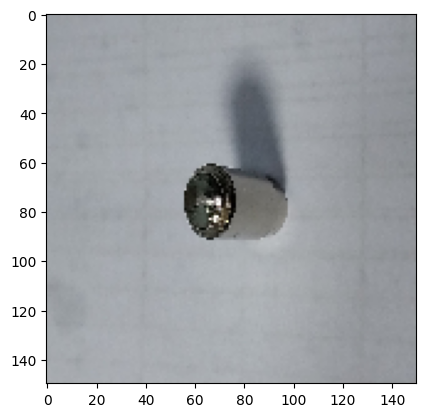

1/1 [==============================] - 0s 30ms/step
590-221 loi mat cat


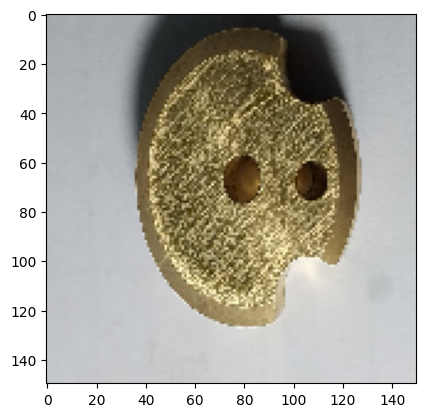

1/1 [==============================] - 0s 31ms/step
1221-A co duoi chuot


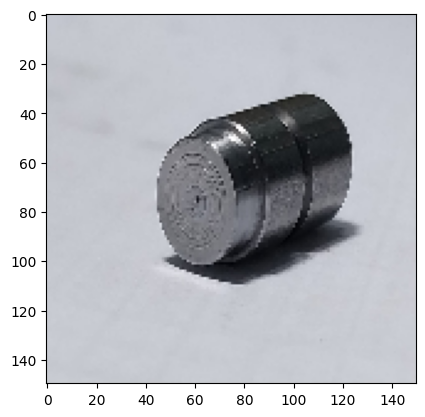

1/1 [==============================] - 0s 28ms/step
1221-A Mặt cắt 6,840


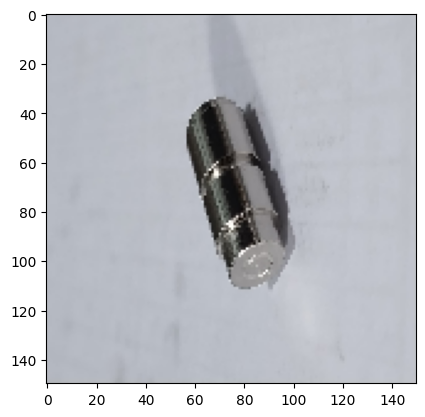

1/1 [==============================] - 0s 27ms/step
1221-A Mặt cắt 6,845


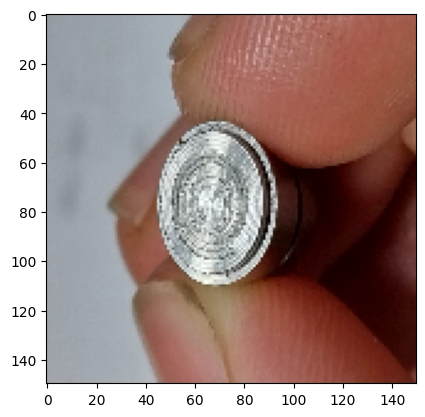

In [ ]:
import os
test= "/content/drive/MyDrive/Colab Notebooks/NHANDIENSPLOI/test"
for i in os.listdir(test):
  img = load_img(test+'/'+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img= img/255
  img = np.expand_dims(img, axis = 0)
  result = model_CNN.predict(img)
  if round(result[0][0]) == 1:
    prediction = '0193-A chua dinh tam'
  if round(result[0][1]) == 1:
    prediction = '1221-A Mặt cắt 6,840'
  if round(result[0][2]) == 1:
    prediction = '1221-A Mặt cắt 6,845'
  if round(result[0][3]) == 1:
    prediction = '1221-A co bac phi'
  if round(result[0][4]) == 1:
    prediction = '1221-A co duoi chuot'
  if round(result[0][5]) == 1:
    prediction = '590-221 loi mat cat'

  print(prediction)
  plt.show()